# Laboratorio di simulazione numerica

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from mpl_toolkits.mplot3d import Axes3D

### Exercise 05.1

In this exercise I sampled the probability distribution of the position of an electron in two selected eigenstates of a hydrogen atom, using the Metropolis algorithm.
To propose the next step in the chain I used:

- a multivariate uniform transition probability, drawing the new position from a cube (centred on the previous position),
- a multivariate Gaussian transition probability, drawing the new position from a normal distribution centred on the previous position.

The parameters in the two cases were tuned in order to get an acceptance ratio of roughly 1/2.

#### Estimation of the equilibration time
Plotting the radius at each step sampled by the Metropolis algorithm, using both types of the transition probability, I make a guess at the equilibration time.
The data in this plot can be generated by running `./exercise05_raw close` (that starts from a point closer to the origin) and `./exercise05_raw far` (that starts from a point farther from the origin).

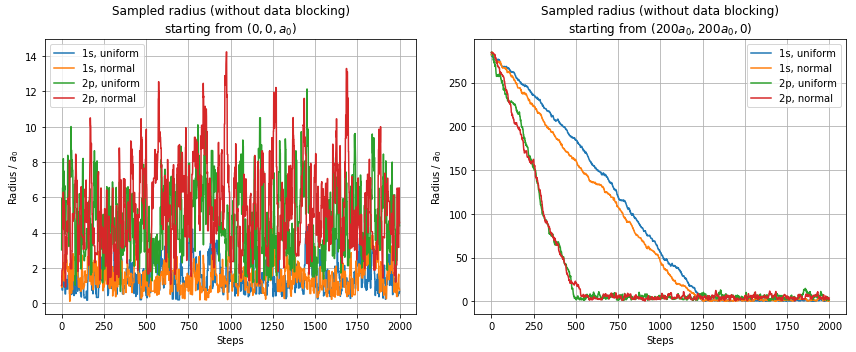

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

radius_raw = np.loadtxt("close/radius_raw.dat", skiprows = 1)
axes[0].plot(radius_raw)
axes[0].set_title("Sampled radius (without data blocking)\n" r"starting from $(0,0,a_0)$")

radius_raw = np.loadtxt("far/radius_raw.dat", skiprows = 1)
axes[1].plot(radius_raw)
axes[1].set_title("Sampled radius (without data blocking)\n" r"starting from $(200a_0, 200a_0, 0)$")

for ax in axes:
    ax.set_xlabel("Steps")
    ax.set_ylabel(r"Radius / $a_0$")
    ax.grid(True)
    ax.legend(["1s, uniform", "1s, normal", "2p, uniform", "2p, normal"])

fig.tight_layout()
plt.show()

It is very clear from these plots that the system starting from the point closer to the origin does not need any equilibration, while the one starting farther from the origin shows a manifestly different behaviour at the beginning of the simulation.
I estimate that the time for the 2p sampling, for the latter, is around 600 steps, while for the 1s sampling it is around 1250 steps.

#### Pictures of the sampled probability functions

##### 1s eigenstate
The following plots show the distribution in space of the sampled points, using $\lvert\psi_{1,0,0}\rvert^2$ as the probability distribution, starting from the two points described above.
I used the algorithm with the uniform distribution only.
Both system were equilibrated before the actual sampling was recorded.

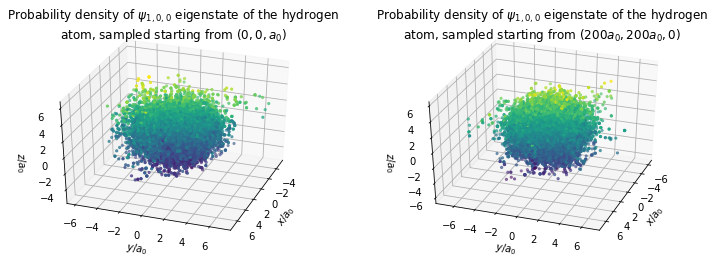

In [44]:
fig = plt.figure(figsize = plt.figaspect(0.33))
# Set up a figure three times as wide as it is tall

ax = fig.add_subplot(1, 2, 1, projection = "3d")
x, y, z = np.loadtxt("close/1s_sampled_points_uniform.dat", unpack = True)
ax.scatter(x, y, z, c = z, marker = ".")
ax.set_xlabel(r"$x / a_0$")
ax.set_ylabel(r"$y / a_0$")
ax.set_zlabel(r"$z / a_0$")
ax.set_title(r"Probability density of $\psi_{1,0,0}$ eigenstate of the hydrogen"
             "\natom, sampled starting from " r"$(0,0,a_0)$")
ax.view_init(35, 20)

ax = fig.add_subplot(1, 2, 2, projection = "3d")
x, y, z = np.loadtxt("far/1s_sampled_points_uniform.dat", unpack = True)
ax.scatter(x, y, z, c = z, marker = ".")
ax.set_xlabel(r"$x / a_0$")
ax.set_ylabel(r"$y / a_0$")
ax.set_zlabel(r"$z / a_0$")
ax.set_title(r"Probability density of $\psi_{1,0,0}$ eigenstate of the hydrogen"
             "\natom, sampled starting from " r"$(200a_0, 200a_0, 0)$")
ax.view_init(35, 20)

plt.show()

There seem to be no remarkable differences between the two cases.

##### 2p eigenstate
The same as above, but using $\lvert\psi_{2,1,0}\rvert^2$ as the probability distribution.

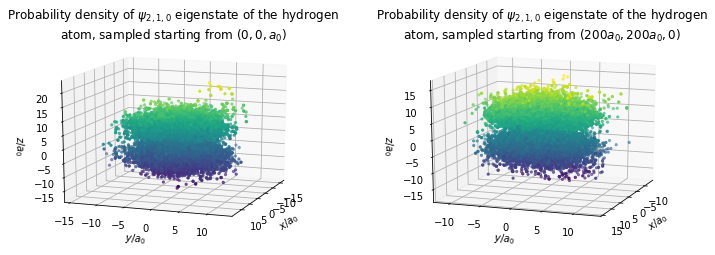

In [52]:
fig = plt.figure(figsize = plt.figaspect(0.33))
# Set up a figure three times as wide as it is tall

ax = fig.add_subplot(1, 2, 1, projection = "3d")
x, y, z = np.loadtxt("close/2p_sampled_points_uniform.dat", unpack = True)
ax.scatter(x, y, z, c = z, marker = ".")
ax.set_xlabel(r"$x / a_0$")
ax.set_ylabel(r"$y / a_0$")
ax.set_zlabel(r"$z / a_0$")
ax.set_title(r"Probability density of $\psi_{2,1,0}$ eigenstate of the hydrogen"
             "\natom, sampled starting from " r"$(0,0,a_0)$")
ax.view_init(15, 20)

ax = fig.add_subplot(1, 2, 2, projection = "3d")
x, y, z = np.loadtxt("far/2p_sampled_points_uniform.dat", unpack = True)
ax.scatter(x, y, z, c = z, marker = ".")
ax.set_xlabel(r"$x / a_0$")
ax.set_ylabel(r"$y / a_0$")
ax.set_zlabel(r"$z / a_0$")
ax.set_title(r"Probability density of $\psi_{2,1,0}$ eigenstate of the hydrogen"
             "\natom, sampled starting from " r"$(200a_0, 200a_0, 0)$")
ax.view_init(15, 20)

plt.show()

Here, too, I see no substantial differences between the two plots.
The different colours are just a consequence of the fact that the first one has some points around $z = 20a_0$, while the second one does not; the "bulk" of the points is, for both plots, contained between $z=-15a_0$ and $z=15a_0$, as can be seen by setting the view angles to (0, 20).

#### Average radius

The following plot shows the progressive value of the average radius, and its standard deviation, of the above results, using a blocking technique, dividing the data in 100 blocks.

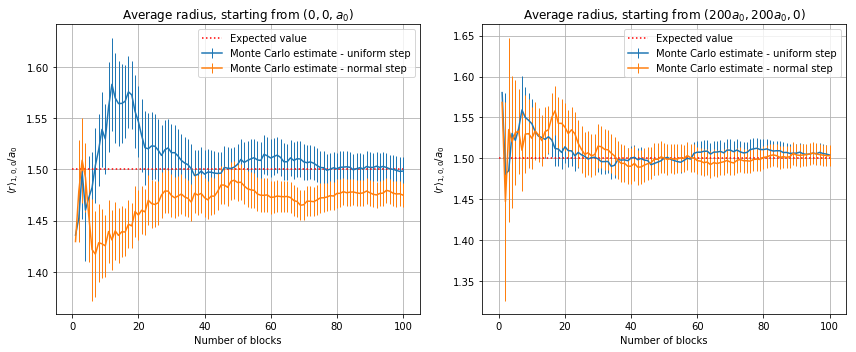

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

radius_1s_far = np.loadtxt("close/1s_radius_avg.dat", unpack = True, skiprows = 1)

axes[0].errorbar(
    range(1, len(radius_1s_far[0]) + 1),
    radius_1s_far[0],
    yerr = radius_1s_far[1],
    elinewidth = 1,
    label = "Monte Carlo estimate - uniform step"
)
axes[0].errorbar(
    range(1, len(radius_1s_far[2]) + 1),
    radius_1s_far[2],
    yerr = radius_1s_far[3],
    elinewidth = 1,
    label = "Monte Carlo estimate - normal step"
)
axes[0].hlines(
    3/2,
    0,
    len(radius_1s_far[0]),
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
axes[0].set_title(r"Average radius, starting from $(0,0,a_0)$")
axes[0].set_ylabel(r"$\langle r\rangle_{1,0,0} / a_0$")
axes[0].set_xlabel("Number of blocks")
axes[0].legend()
axes[0].grid(True)

radius_1s_far = np.loadtxt("far/1s_radius_avg.dat", unpack = True, skiprows = 1)

axes[1].errorbar(
    range(1, len(radius_1s_far[0]) + 1),
    radius_1s_far[0],
    yerr = radius_1s_far[1],
    elinewidth = 1,
    label = "Monte Carlo estimate - uniform step"
)
axes[1].errorbar(
    range(1, len(radius_1s_far[2]) + 1),
    radius_1s_far[2],
    yerr = radius_1s_far[3],
    elinewidth = 1,
    label = "Monte Carlo estimate - normal step"
)
axes[1].hlines(
    3/2,
    0,
    len(radius_1s_far[0]),
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
axes[1].set_title(r"Average radius, starting from $(200a_0, 200a_0, 0)$")
axes[1].set_ylabel(r"$\langle r\rangle_{1,0,0} / a_0$")
axes[1].set_xlabel("Number of blocks")
axes[1].legend()
axes[1].grid(True)

fig.tight_layout()
plt.show()

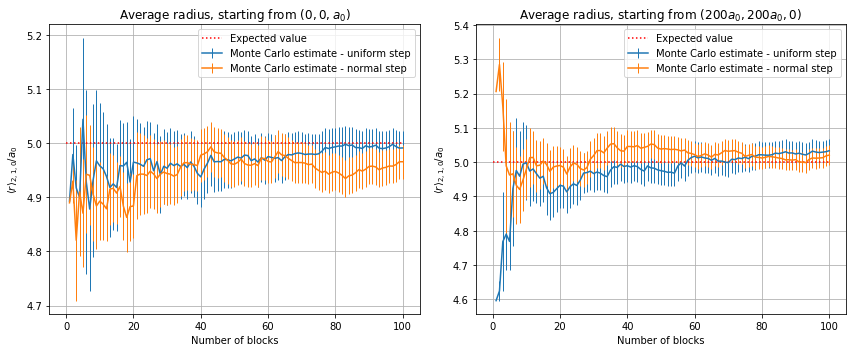

In [56]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

radius_2p_far = np.loadtxt("close/2p_radius_avg.dat", unpack = True, skiprows = 1)

axes[0].errorbar(
    range(1, len(radius_2p_far[0]) + 1),
    radius_2p_far[0],
    yerr = radius_2p_far[1],
    elinewidth = 1,
    label = "Monte Carlo estimate - uniform step"
)
axes[0].errorbar(
    range(1, len(radius_2p_far[2]) + 1),
    radius_2p_far[2],
    yerr = radius_2p_far[3],
    elinewidth = 1,
    label = "Monte Carlo estimate - normal step"
)
axes[0].hlines(
    5,
    0,
    len(radius_2p_far[0]),
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
axes[0].set_title(r"Average radius, starting from $(0,0,a_0)$")
axes[0].set_ylabel(r"$\langle r\rangle_{2,1,0} / a_0$")
axes[0].set_xlabel("Number of blocks")
axes[0].legend()
axes[0].grid(True)

radius_2p_far = np.loadtxt("far/2p_radius_avg.dat", unpack = True, skiprows = 1)

axes[1].errorbar(
    range(1, len(radius_2p_far[0]) + 1),
    radius_2p_far[0],
    yerr = radius_2p_far[1],
    elinewidth = 1,
    label = "Monte Carlo estimate - uniform step"
)
axes[1].errorbar(
    range(1, len(radius_2p_far[2]) + 1),
    radius_2p_far[2],
    yerr = radius_2p_far[3],
    elinewidth = 1,
    label = "Monte Carlo estimate - normal step"
)
axes[1].hlines(
    5,
    0,
    len(radius_2p_far[0]),
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
axes[1].set_title(r"Average radius, starting from $(200a_0, 200a_0, 0)$")
axes[1].set_ylabel(r"$\langle r\rangle_{2,1,0} / a_0$")
axes[1].set_xlabel("Number of blocks")
axes[1].legend()
axes[1].grid(True)

fig.tight_layout()
plt.show()